In [1]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12,7
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20
import numpy as np
import os 
my_path = os.path.abspath('/Users/juan/Desktop/3level_img/')

class case_2():
    def __init__(self):
        #carnot efficiency
        self.n_c = np.flip(np.arange(1e-6,1.02,0.02),-1)
        #temperatures
        self.b_l = 1/np.array([150,50,25])[1] 
        self.b_h  = (1-self.n_c)*self.b_l
        
        # eigen energies
        self.w10 = 20
        self.w2w1 = 1.6
        
        # lambda/w10
        self.lw = np.linspace(0,np.sqrt(self.w2w1),100)
        # instantaneous eigen energies
        self.e_20 = self.w10*((1+self.w2w1 )/2 + np.sqrt(((self.w2w1-1)/2 )**2 +(self.lw)**2  ))
        self.e_10 = self.w10*((1+self.w2w1 )/2 - np.sqrt(((self.w2w1-1)/2 )**2 +(self.lw)**2  ))
        #lindblad constants
        self.g_l  = 100
        #self.g_h  = np.array([self.g_l,self.g_l*0.5,self.g_l*0.2])
        self.g_h  = self.g_l*5
        self.g    = (self.g_l+ self.g_h)/2
        #cosine data
        self.c    = (self.w2w1 -1 )/(2*np.sqrt(((self.w2w1-1)/2 )**2 +(self.lw)**2 ))
        #case_3 (eta_c)
        
        self.GA = (self.g/(self.e_20-self.e_10))**2
        

    def H(self):
        H_3 =[]
        for value in range(len(self.b_h)):
            H_3.append( (np.exp(-self.b_l*self.e_20 )-np.exp(-self.b_h[value]*self.e_20)\
                        + np.exp(-self.b_h[value]*self.e_10)-np.exp(-self.b_l*self.e_10 ) )\
                        /(1/2*(2+ np.exp(-self.b_l*self.e_20 )+np.exp(-self.b_h[value]*self.e_20)\
                        + np.exp(-self.b_h[value]*self.e_10)+np.exp(-self.b_l*self.e_10 ) )) )
                #print(step)
        return H_3
    def I(self):
        I_3= []
        for value in range(len(self.b_h)):
            I_3.append( ((1+np.exp(-self.b_l*self.e_20)+np.exp(-self.b_h[value]*self.e_20) )/(self.g_l)\
                        +(1+np.exp(-self.b_h[value]*self.e_10)+np.exp(-self.b_l*self.e_10 ))/self.g_h)\
                        /(1/2*(2+ np.exp(-self.b_l*self.e_20 )+np.exp(-self.b_h[value]*self.e_20)\
                        + np.exp(-self.b_h[value]*self.e_10)+np.exp(-self.b_l*self.e_10 ) ))) 
        return I_3
    def J(self):
        J_3 =[]
        for value in range(len(self.b_h)):
            J_3.append( ((np.exp(-self.b_l*self.e_20)-np.exp(-self.b_h[value]*self.e_20))/self.g_l \
                        +(np.exp(-self.b_h[value]*self.e_10)-np.exp(-self.b_l*self.e_10))/self.g_h )\
                        /(1/2*(2+ np.exp(-self.b_l*self.e_20 )+np.exp(-self.b_h[value]*self.e_20)\
                        + np.exp(-self.b_h[value]*self.e_10)+np.exp(-self.b_l*self.e_10 ) )))
        return J_3
var =case_2()



In [2]:
#case 2
def power_l2(var,index):
    c = var.c
    b_l= var.b_l
    b_h= var.b_h[index]
    H  = var.H()[index]
    I  = var.I()[index]
    J  = var.J()[index]
    
    
    power_l2 = ( (var.e_20-var.e_10) *((1 + var.GA)*(1- c**2)*\
                (((1-c )/2 )*(np.exp(-b_l*var.e_20)-np.exp(-b_h*var.e_10) )\
                +((1+c )/2 )*(np.exp(-b_h*var.e_20)-np.exp(-b_l*var.e_10) )) ))\
                /((2+np.exp(-b_l*var.e_20)+np.exp(-b_h*var.e_20)\
                +np.exp(-b_l*var.e_10)+np.exp(-b_h*var.e_10))\
                *( (var.GA/var.g)*c**2 - ((var.GA)/(2*var.g))*H*c**3\
                + ((1-c**2)/2)*(1+ var.GA)*(I-J*c) ))
   
    # eliminate unwanted values
    return power_l2


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


51

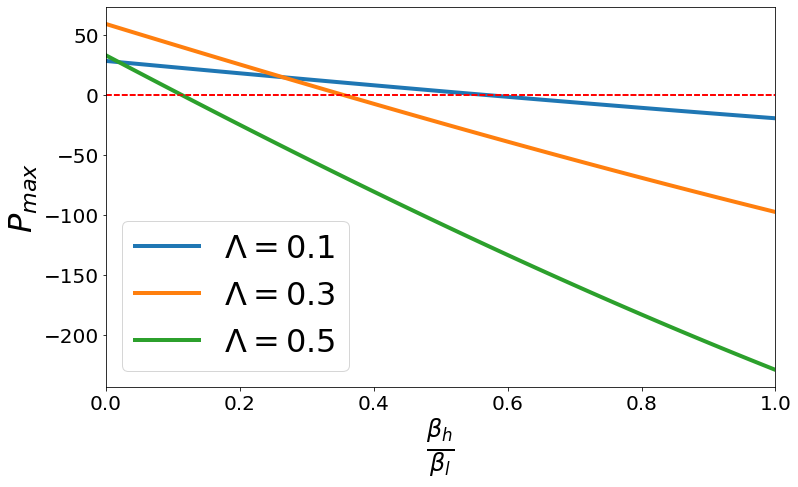

In [3]:
var2 = case_2()
def POWER_beta(var):
    POWER=[]
    for value in range(len(var.b_h)):
        POWER.append(power_l2(var2,value))
    return POWER
        
PO= POWER_beta(var2)

a =np.transpose(PO)
for i in range(10,50,15):
    #plt.plot(var.b_h,a[:][-(i+1)])
    plt.plot(var.b_h/var2.b_l,a[:][i], label= r'$\Lambda =%.1f$'%(var2.lw[i]),linewidth=4)
    #plt.ylim(-10,500)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel(r'$\frac{\beta_h}{\beta_l}$', fontsize =34)
    plt.ylabel(r'$P_{max}$',fontsize= 32)
    plt.legend(fontsize= 32)
    plt.xlim(0,1)
    #plt.title('maximized power against temperature' +r'$( T_l=%.f)$'%(1/var2.b_l ),fontsize=18)
    plt.savefig(os.path.join(my_path,'L2_Pvs_bh.eps'))
    #plt.savefig(os.path.join(my_path,'L2_Pvs_bh.png'))
1/var2.b_l
len(a[0])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


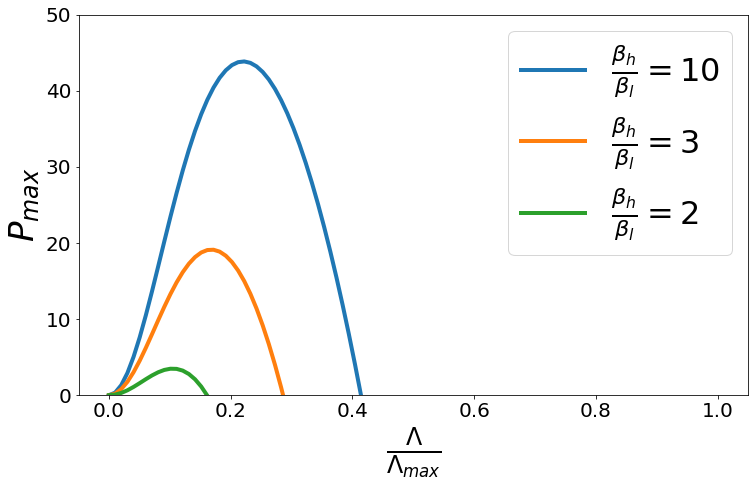

In [9]:

def PO_max(p):
    result =[]
    for element in p:
        result.append(max(element))
    return result
y = PO_max(PO)

for i in range(5,31,10):
    plt.plot(var2.lw/max(var2.lw),PO[i],label=r'$\frac{\beta_h}{\beta_l} = %.f$'\
             %(var2.b_l/var2.b_h[i]),linewidth=4 )
    plt.ylim(-0,50)
    plt.xlabel(r'$\frac{\Lambda}{ \Lambda_{max}}$', fontsize =34)
    plt.ylabel(r'$P_{max}$',fontsize= 34)
    plt.legend(fontsize= 32)
    #plt.title('maximized power against field intensity',fontsize=18)
    #plt.savefig(os.path.join(my_path,'L2_Pvs_lambda.png'))
    plt.savefig(os.path.join(my_path,'L2_Pvs_lambda.eps'))



#plt.plot(var.b_h,y)

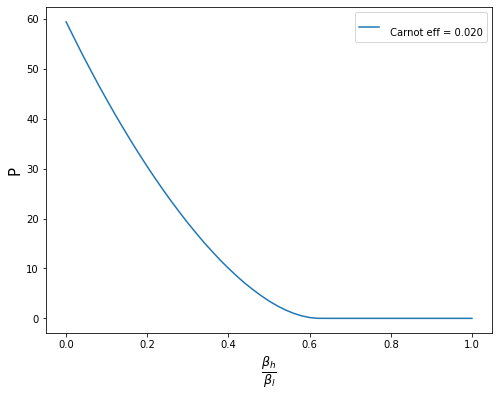

In [65]:

plt.plot(var.b_h/var2.b_l,y,label='\n Carnot eff = %.3f'%(var2.b_l) )
plt.xlabel(r'$\frac{\beta_h}{\beta_l}$', fontsize =18)

plt.ylabel('P',fontsize=15)
plt.legend()



In [10]:

def n_l2(var,power,index):
    b_l= var.b_l
    b_h= var.b_h[index]
    c = var.c
    p = power[index]
    eta_0 =  (1 - (var.e_10)/(var.e_20))/(1 - ((1-c)/2)*(1+ var.e_10/var.e_20 ))
    p_0   =  var.g_l*var.e_10*((1-c**2)/4)*(np.exp(-b_h*var.e_10)-np.exp(-b_l*var.e_10) ) \
            +var.g_h*var.e_20*((1-c**2)/4)*(np.exp(-b_h*var.e_20)-np.exp(-b_l*var.e_20) )
    om_s  = ((var.e_20-var.e_10)**2 +var.g**2)/((var.e_20-var.e_10)*c)
    rho_0 =  (((1-c**2)*om_s)/var.g_l+((1-c**2)*om_s)/var.g_h + (2*var.g*c)/(var.e_20-var.e_10) ) \
            /( (1+ (1-c)*np.exp(-b_l*var.e_20) +(1+c)*np.exp(-b_h*var.e_20) )\
              *( ((1-c**2)*om_s)/var.g_l+(var.g*c)/(var.e_20-var.e_10))\
             +( (1+ (1+c)*np.exp(-b_l*var.e_10) +(1-c)*np.exp(-b_h*var.e_10) )\
              *( ((1-c**2)*om_s)/var.g_h+(var.g*c)/(var.e_20-var.e_10))))
   
    n = eta_0*((p))/(p+ eta_0*rho_0*p_0 )
    return n


<ipython-input-10-fd8578f3ee33>:16: RuntimeWarning: invalid value encountered in true_divide
  n = eta_0*((p))/(p+ eta_0*rho_0*p_0 )
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


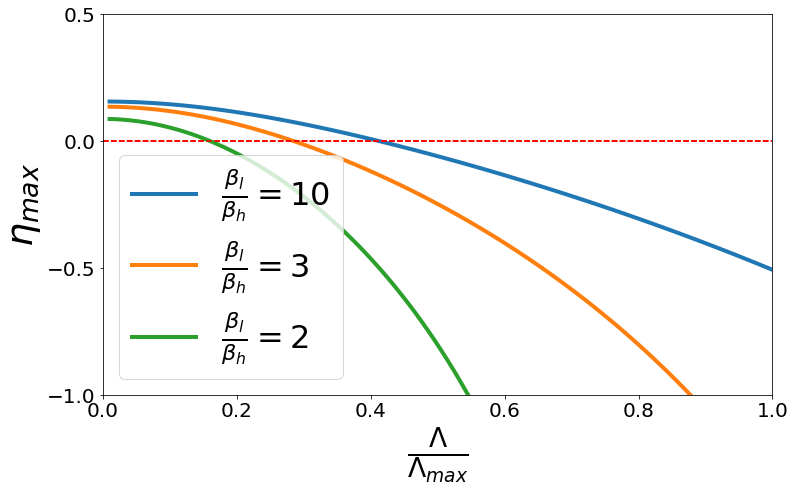

In [17]:
def EFF_beta(var,power):
    E=[]
    for value in range(len(var.b_h)):
        E.append(n_l2(var2,power,value))
    return E
 
EFF = EFF_beta(var2,PO)    

for i in range(5,31,10):
    plt.plot(var2.lw/max(var2.lw),EFF[i],label=r'$\frac{\beta_l}{\beta_h} = %.f$'\
             %(var2.b_l/var2.b_h[i]),linewidth=4 )
    plt.ylim(-1,0.5)
    plt.xlim(0,1)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel(r'$\frac{\Lambda}{ \Lambda_{max}}$', fontsize =38)
    plt.ylabel(r'$\eta_{max}$',fontsize= 38)
    plt.yticks(np.arange(-1, .75, 0.5))
    #plt.title('maximized efficiency against field intensity',fontsize=18)
    plt.legend(fontsize=32)
    #plt.savefig(os.path.join(my_path,'L2_nvs_lambda.png'))
    plt.savefig(os.path.join(my_path,'L2_nvs_lambda.eps'))


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


51

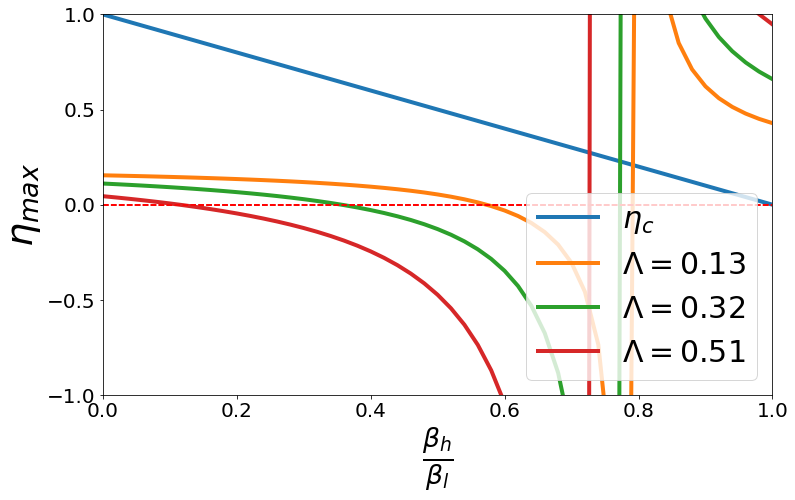

In [21]:

b =np.transpose(EFF)
plt.plot(var2.b_h/var2.b_l, var2.n_c,label = r'$\eta_c$',linewidth=4)

plt.legend()
for i in range(10,50,15):
    #plt.plot(var.b_h,a[:][-(i+1)])
    plt.plot(var2.b_h/var2.b_l,b[:][i], label= r'$\Lambda =%.2f$'%(var2.lw[i]),linewidth =4)
   
    plt.ylim(-1,1)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.yticks(np.arange(-1, 1.2, 0.5))
    plt.xlabel(r'$\frac{\beta_h}{\beta_l}$', fontsize =38)
    plt.ylabel(r'$\eta_{max}$',fontsize= 38)
   # plt.title('maximized efficiency against temperature '+r'$T_l= %.f$'%(1/var2.b_l), fontsize=18)
    plt.legend(fontsize= 30)
    plt.xlim(0,1)
    #plt.savefig(os.path.join(my_path,'L2_nvs_bh.png'))
    plt.savefig(os.path.join(my_path,'L2_nvs_bh.eps'))
 
1/var2.b_l
len(a[0])


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


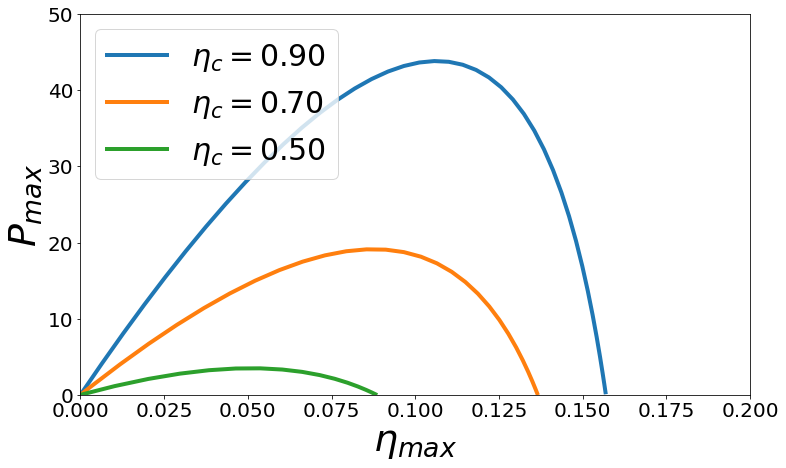

In [24]:
for i in range(5,31,10):
    plt.plot(EFF[i],PO[i],label=r'$\eta_c= %.2f$'%(var2.n_c[i]),linewidth=4)
    plt.xlim(0,0.2)
    plt.ylim(0,50)
    plt.xlabel(r'$\eta_{max}$', fontsize =38)
    plt.ylabel(r'$P_{max}$',fontsize= 38)
   # plt.title('maximized power against maximized efficiency',fontsize=18)
   # plt.savefig(os.path.join(my_path,'L2_Pvs_n.png'))
    plt.savefig(os.path.join(my_path,'L2_Pvs_n.eps'))
    
    plt.legend(fontsize=30)